In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [2]:


#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [3]:


##display the first five rows of the train dataset.
train.head(5)



,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN,total_price
0,e3mMIMR3JJqCaXz1,8,21,18674,4,3,2,6271,2,nan,...,58,1,157,1,2483,1,6011,1,34.470,647603.770
1,LgwzgklNvy4QCtq5,8,7,18800,5,1,2,7885,2,nan,...,28,1,115,1,15872,1,32221,1,40.074,3321452.000
2,ucIR2NLLsC3T650L,8,7,19289,4,1,2,6028,2,nan,...,78,1,212,1,15760,1,32228,1,54.462,9570885.316
3,jre1pJhcQj91Kdky,8,21,20385,24,0,2,18325,0,nan,...,20,1,125,1,2568,1,7271,1,99.629,14215011.127
4,rQpYpY9nRG7X5mmr,1,21,20657,2,4,2,6880,2,nan,...,18,1,47,1,2587,1,7442,1,124.131,762711.976


In [4]:


##display the first five rows of the test dataset.
test.head(5)



,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,XIV_250,XIV_500,XIV_index_500,XIV_1000,XIV_index_1000,XIV_5000,XIV_index_5000,XIV_10000,XIV_index_10000,XIV_MIN
0,X5gsdTWGS3W7JJQB,1,13,18634,2,4,2,1857,2,nan,...,7,21,1,129,1,3991,1,8409,1,105.462
1,BTshNOJyKHnT2YIT,8,7,20199,10,3,2,16011,2,nan,...,18,44,1,67,1,1950,1,10725,1,100.820
2,dhdymr0lV8N5kZOT,8,12,19769,4,4,10,18294,2,nan,...,0,3,1,35,1,3707,1,19459,1,259.801
3,VEwyGGMcD56w5BOc,10,7,20479,19,2,0,17837,2,nan,...,16,60,1,144,1,6487,1,29400,1,22.942
4,wmUeMoJZfsqaSX9b,8,3,18164,13,0,2,13272,2,nan,...,4,18,1,76,1,1346,1,3280,1,181.213


In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['building_id']
test_ID = test['building_id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("building_id", axis = 1, inplace = True)
test.drop("building_id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (60000, 235) 
The test data size before dropping Id feature is : (10000, 234) 

The train data size after dropping Id feature is : (60000, 234) 
The test data size after dropping Id feature is : (10000, 233) 


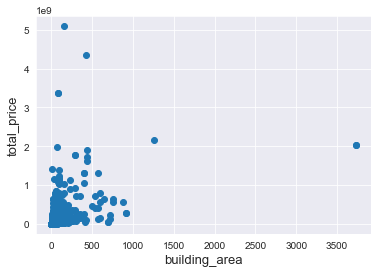

In [6]:


fig, ax = plt.subplots()
ax.scatter(x = train['building_area'], y = train['total_price'])
plt.ylabel('total_price', fontsize=13)
plt.xlabel('building_area', fontsize=13)
plt.show()



<function matplotlib.pyplot.show>

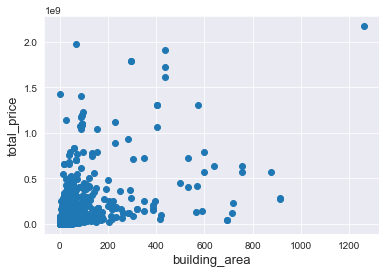

In [7]:


#Deleting outliers
train = train.drop(train[(train['building_area']<1000) & (train['total_price']>3000000000)].index)
train = train.drop(train[(train['building_area']>2000) & (train['total_price']<3000000000)].index)
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['building_area'], train['total_price'])
plt.ylabel('total_price', fontsize=13)
plt.xlabel('building_area', fontsize=13)
plt.show



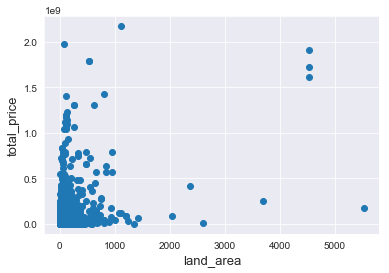

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = train['land_area'], y = train['total_price'])
plt.ylabel('total_price', fontsize=13)
plt.xlabel('land_area', fontsize=13)
plt.show()

<function matplotlib.pyplot.show>

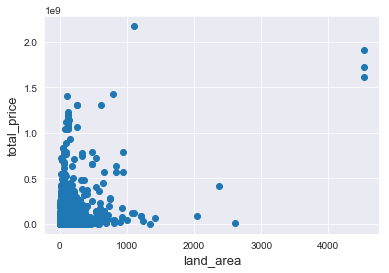

In [9]:
#Deleting outliers
train = train.drop(train[(train['land_area']<1000) & (train['total_price']>1500000000)].index)
train = train.drop(train[(train['land_area']>3000) & (train['total_price']<500000000)].index)
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['land_area'], train['total_price'])
plt.ylabel('total_price', fontsize=13)
plt.xlabel('land_area', fontsize=13)
plt.show

In [10]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['txn_dt'], y = train['total_price'])
# plt.ylabel('total_price', fontsize=13)
# plt.xlabel('txn_dt', fontsize=13)
# plt.show()

In [11]:
# #Deleting outliers
# train = train.drop(train[(train['village_income_median']>1500)].index)
# train = train.drop(train[(train['total_price']>1500)].index)
# #Check the graphic again
# fig, ax = plt.subplots()
# ax.scatter(train['village_income_median'], train['total_price'])
# plt.ylabel('total_price', fontsize=13)
# plt.xlabel('village_income_median', fontsize=13)
# plt.show


 mu = 12502248.17 and sigma = 40272600.24



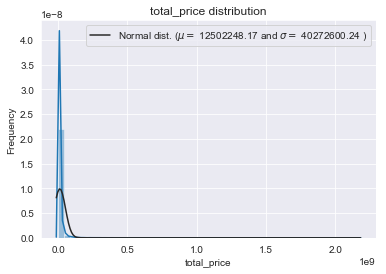

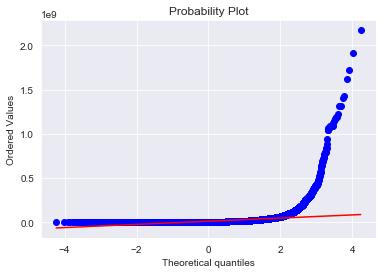

In [12]:


sns.distplot(train['total_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['total_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['total_price'], plot=plt)
plt.show()




 mu = 15.52 and sigma = 1.16



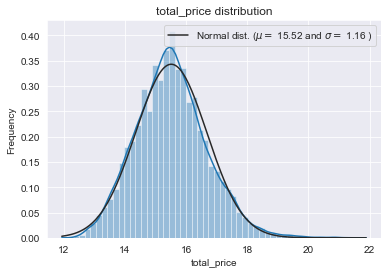

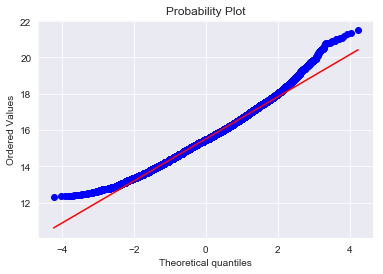

In [13]:


#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["total_price"] = np.log1p(train["total_price"])

#Check the new distribution 
sns.distplot(train['total_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['total_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['total_price'], plot=plt)
plt.show()



In [14]:


ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.total_price.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['total_price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))



all_data size is : (69989, 233)


In [15]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
parking_area,94.852
parking_price,76.821
txn_floor,26.478
village_income_median,1.895


Text(0.5,1,'Percent missing data by feature')

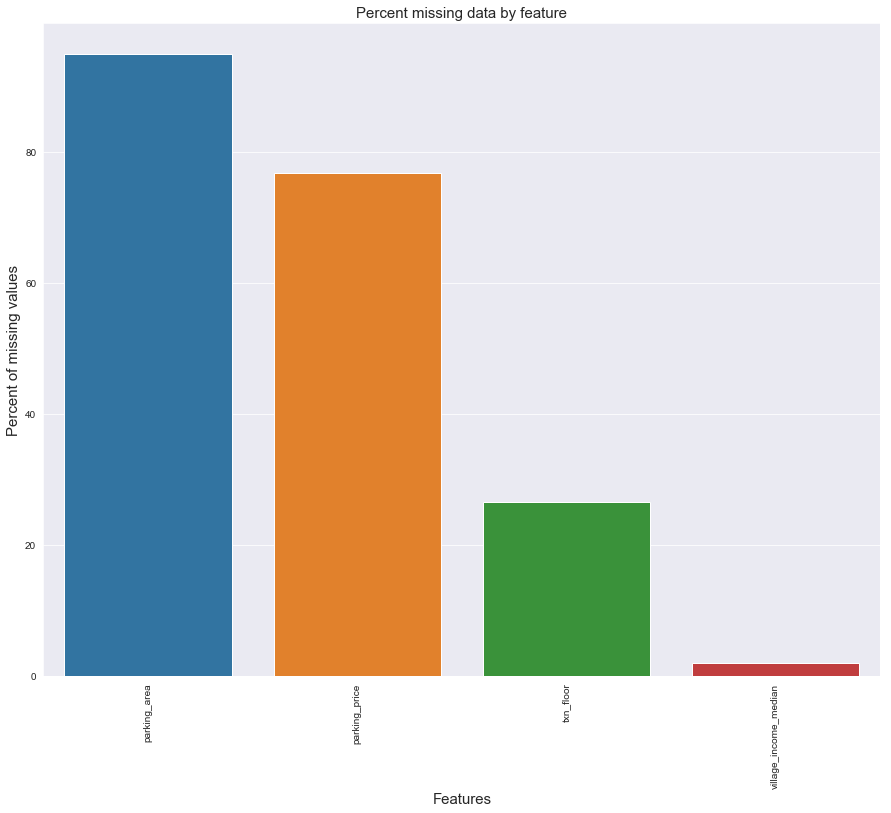

In [16]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

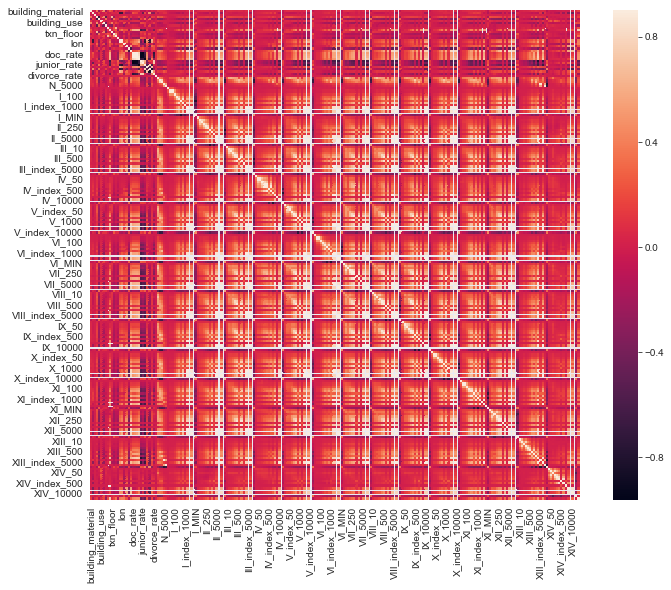

In [17]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [18]:
all_data["parking_area"] = all_data["parking_area"].fillna("None")

In [19]:
all_data["parking_price"] = all_data["parking_price"].fillna("None")

In [20]:
all_data["txn_floor"] = all_data["txn_floor"].fillna(0)

In [21]:
all_data["village_income_median"] = all_data["village_income_median"].fillna(641)

In [22]:


#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()



,Missing Ratio


In [23]:


#MSSubClass=The building class
all_data['building_material'] = all_data['building_material'].apply(str)


#Changing OverallCond into a categorical variable
all_data['building_type'] = all_data['building_type'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['txn_dt'] = all_data['txn_dt'].astype(str)
all_data['building_complete_dt'] = all_data['building_complete_dt'].astype(str)
all_data['parking_way'] = all_data['parking_way'].astype(str)
all_data['txn_floor'] = all_data['txn_floor'].astype(str)



In [24]:
from sklearn.preprocessing import LabelEncoder
cols = (
'building_complete_dt', 'building_material', 'txn_dt', 
'parking_way', 'land_area', 'building_area', 
'town', 'lat', 'lon', 'village_income_median', 'town_population_density', 
'doc_rate', 'master_rate', 'bachelor_rate', 'jobschool_rate', 'highschool_rate', 
'junior_rate', 'elementary_rate', 'born_rate', 'divorce_rate', 'N_500', 
'N_1000', 'I_1000', 'I_5000', 'I_10000', 'II_500', 
'II_1000', 'II_5000', 'II_10000', 'III_250', 'III_500', 
'III_1000', 'III_5000', 'III_10000', 'IV_index_500', 'IV_1000', 
'IV_5000', 'IV_10000', 'IV_MIN', 'V_100', 'V_250', 
'V_500', 'V_1000', 'V_5000', 'V_10000', 'VI_250', 
'VI_500', 'VI_index_500', 'VI_1000', 'VI_5000', 'VI_10000', 
'VI_MIN', 'VII_50', 'VII_100', 'VII_250', 'VII_500', 
'VII_1000', 'VII_5000', 'VII_10000', 'VIII_250', 'VIII_500', 
'VIII_1000', 'VIII_5000', 'VIII_10000', 'IX_100', 'IX_250', 
'IX_500', 'IX_1000', 'IX_5000', 'IX_10000', 'X_250', 
'X_500', 'X_1000', 'X_5000', 'X_10000', 'XI_250', 
'XI_500', 'XI_1000', 'XI_5000', 'XI_10000', 'XII_250', 
'XII_500', 'XII_1000', 'XII_5000', 'XII_10000', 'XIII_500', 
'XIII_1000', 'XIII_index_1000', 'XIII_5000', 'XIII_10000', 'XIV_10000')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (69989, 233)


In [25]:


numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)




Skew in numerical features: 



,Skew
VI_10,28.643
XIII_10,27.476
XIII_50,18.476
IV_10,17.639
X_10,17.426
XIII_100,16.425
I_10,15.264
XI_10,14.521
XIII_250,12.100
VIII_50,11.648


In [26]:


skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])



There are 229 skewed numerical features to Box Cox transform


In [27]:


all_data = pd.get_dummies(all_data)
print(all_data.shape)



(69989, 482)


In [28]:


train = all_data[:ntrain]
test = all_data[ntrain:]



In [29]:


from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



In [30]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [31]:


lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))



In [32]:


ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))



In [33]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [34]:


GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=7, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=20, 
                                   loss='huber', random_state =5)



In [35]:


model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=7, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



In [36]:


model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=7,
                              learning_rate=0.05, n_estimators=1500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf = 9, min_sum_hessian_in_leaf = 15)



In [37]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3454 (0.0043)



In [38]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3449 (0.0043)



In [39]:


# score = rmsle_cv(KRR)
# print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



In [40]:


score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Gradient Boosting score: 0.2107 (0.0053)



In [41]:


score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Xgboost score: 0.2039 (0.0058)



In [42]:


score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))



LGBM score: 0.2433 (0.0061)



In [43]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [44]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.2778 (0.0046)



In [45]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [46]:


stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))



Stacking Averaged models score: 0.2066 (0.0056)


In [47]:


def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))



In [48]:


stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))



0.12977362192739975


In [49]:


model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))



0.09185024795116621


In [50]:


model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))



0.22567866694230235


In [51]:


'''RMSE on the entire Train data when averaging'''
print('RMSLE score on train data: <STD>')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.05 +
               xgb_train_pred*0.9 + lgb_train_pred*0.05 ))



RMSLE score on train data: <STD>
0.13151389124161433
RMSLE score on train data:
0.09614204653463856


In [52]:
ensemble = stacked_pred*0.05 + xgb_pred*0.9 + lgb_pred*0.05

In [53]:


sub = pd.DataFrame()
sub['building_id'] = test_ID
sub['total_price'] = ensemble

In [54]:
sub.to_csv('Prediction.csv',index=False)